<a href="https://colab.research.google.com/github/fco-parga/MNA-2023-September_Advanced_Machine_Learning_Methods/blob/activity_3a/Activity%203a%20-%20Exploring%20Word%20Embeddings%20with%20GloVe%20and%20Numpy/TC4033_Activity3a_ID18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Team members

- Francisco Javier Parga García A01794380
- Matthias Sibrian Illescas A01794249
- Enrique Hernández García A01793727
- Alejandro Tomás Mackey A01164338

#### Import libraries

In this section, we will be importing necessary libraries and configuring the environment for our data analysis and visualization. We will start by importing the required libraries and setting up the Matplotlib style for our plots.

In [1]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle

# Set Matplotlib style
plt.style.use('ggplot')

#### Load file

In the following step, we will download the pre-trained GloVe word vectors from the Hugging Face model hub. This dataset will be used in our analysis. The provided link: https://nlp.stanford.edu/data/glove.6B.zip was not available for download. Instead, we used the following link from HuggingFace, which contains the same dataset: https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip

In [2]:
!wget https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip  -q --show-progress

glove.6B.zip        100%[===================>] 822.24M   161MB/s    in 7.1s    


After downloading the GloVe word vectors, we will now unzip the dataset to access the word embeddings.

In [3]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
  inflating: glove.6B.50d.txt        


Now, we specify the path to the GloVe word embeddings file and the embedding dimension we will use in our analysis.

In [10]:
# PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.200d.txt'
#PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.50d.txt'

PATH = 'glove.6B.50d.txt'
emb_dim = 50

To get an initial look at the data, we will display the first 5 lines of the GloVe word embeddings file.

In [12]:
!head -5 $PATH

the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658 -0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801 -0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051 -0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213 0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749 -0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514 -0.78581
, 0.013441 0.23682 -0.16899 0.40951 0.63812 0.47709 -0.42852 -0.55641 -0.364 -0.23938 0.13001 -0.063734 -0.39575 -0.48162 0.23291 0.090201 -0.13324 0.078639 -0.41634 -0.15428 0.10068 0.48891 0.31226 -0.1252 -0.037512 -1.5179 0.12612 -0.02442 -0.042961 -0.28351 3.5416 -0.11956 -0.014533 -0.1499 0.21864 -0.33412 -0.13872 0.31806 0.70358 0.44858 -0.080262 0.63003 0.32111 -0.46765 0.22786 0.36034 -0.37818 -0.56657 0.044691 0.30392
. 0.15164 0.30177 -0.16763 0.17684 0.31719 0.33973 -0.43478 -0.31086 -0.44999 -0.29486 0.16608 0.11963 -0.41328 -0.42353

Next, we define a function to create a dictionary containing word embeddings from the GloVe word vectors file.

In [13]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    # open the text file and read the lines
    with open(path, 'r') as f:
        lines = f.readlines()
    # initialize an empty dictionary
    emb_dict = {}
    # loop through the lines
    for line in lines:
        # split the line by whitespace
        tokens = line.split()
        # the first token is the word, the rest are the embedding values
        word = tokens[0]
        emb = [float(x) for x in tokens[1:]]
        # add the word and the embedding to the dictionary
        emb_dict[word] = emb
    # return the dictionary
    return emb_dict

We will now create a dictionary, `embeddings_dict`, by using the `create_emb_dictionary` function to load word embeddings from the GloVe file.

In [14]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

e will now save the `embeddings_dict` to a file and provide code to deserialize it.

In [15]:
# Serialize
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### See some embeddings

We define a function, `show_n_first_words`, that displays the first n words from a file.

In [16]:
# Define a function to display the first n words from a file
def show_n_first_words(path, n_words):
    with open(path, 'r') as f:
        for i, line in enumerate(f):
            # Split the line into words and print them
            print(line.split(), len(line.split()[1:]))
            if i >= n_words:
                break

Now, let's use the `show_n_first_words` function to display the first 5 words from the loaded file.

In [17]:
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

We define a function, `plot_embeddings`, that allows us to visualize word embeddings using dimensionality reduction techniques.

In [32]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func = PCA):
    # initialize the dimensionality reduction function
    dim_red = func(n_components=2)
    # create an empty matrix to store the embeddings
    emb_matrix = np.zeros((len(words2show), emb_dim))
    # loop through the words and fill the matrix with their embeddings
    for i, word in enumerate(words2show):
        emb_matrix[i] = embeddings_dict[word]
    # apply the dimensionality reduction function to the matrix
    reduced_emb_matrix = dim_red.fit_transform(emb_matrix)
    reduced_emb_dic = {}

    # create a scatter plot of the reduced embeddings
    plt.scatter(reduced_emb_matrix[:, 0], reduced_emb_matrix[:, 1])
    # annotate the points with the words
    for i, word in enumerate(words2show):
        plt.annotate(word, xy=(reduced_emb_matrix[i, 0], reduced_emb_matrix[i, 1]))
        reduced_emb_dic[word] = reduced_emb_matrix[i]
    # show the plot
    plt.show()

    return reduced_emb_dic

We have defined a list of words, `words`, that we will use for visualization in the next step.

In [33]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']

Now, let's use the `plot_embeddings` function to visualize the word embeddings for the selected words. The last parameter of the function allows to select the dimensionality reduction technique. We use each separately, PCA and t-SNE, one after another, to generate visualizations. Basically, this techniques allow to plot the distributions into the two axes of greatest variance.

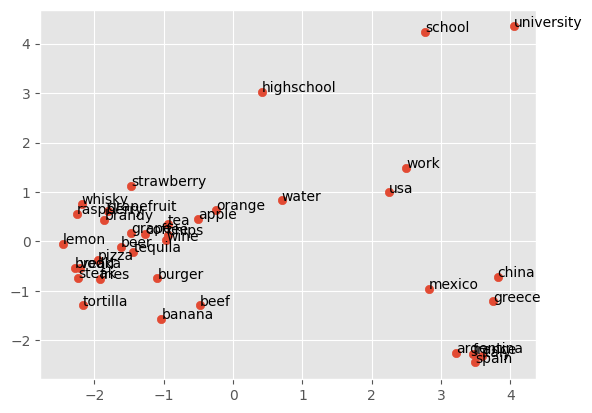

In [34]:
# PCA dimensionality reduction for visualization
reduced_emb_dic = plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

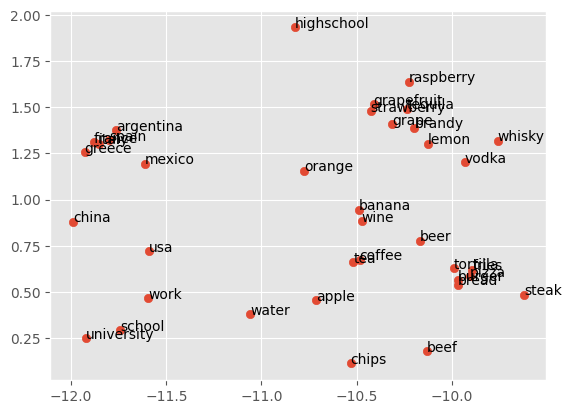

In [35]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

### Let us compute analogies

We define a function, `analogy`, that allows us to perform word analogies using word embeddings.

In [38]:
# analogy
def analogy(word1, word2, word3, embeddings_dict):
    # get the embeddings of the words from the dictionary
    v1 = np.array(embeddings_dict[word1])
    v2 = np.array(embeddings_dict[word2])
    v3 = np.array(embeddings_dict[word3])
    # compute the vector for the analogy
    v4 = v2 - v1 + v3
    # find the word that is closest to v4 in cosine similarity
    max_sim = -999
    best_word = None
    for word, vec in embeddings_dict.items():
        # skip the words that are already in the analogy
        if word in [word1, word2, word3]:
            continue
        # compute the cosine similarity
        sim = np.dot(v4, vec) / (np.linalg.norm(v4) * np.linalg.norm(vec))
        # update the best word and the max similarity
        if sim > max_sim:
            max_sim = sim
            best_word = word
    # return the best word
    return best_word

Now, we call the function to find the analogy for the word 'queen', using 'man' to 'king' as test. 

In [39]:
analogy('man', 'king', 'woman', embeddings_dict)

'queen'

We define a function, `find_most_similar`, that allows us to find the most similar words to a given word using cosine similarity with word embeddings.

In [40]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):
    # get the embedding of the word from the dictionary
    v = np.array(embeddings_dict[word])
    # initialize an empty list to store the similarities
    most_similar = []
    # loop through the words and embeddings in the dictionary
    for w, vec in embeddings_dict.items():
        # skip the word itself
        if w == word:
            continue
        # compute the cosine similarity
        sim = np.dot(v, vec) / (np.linalg.norm(v) * np.linalg.norm(vec))
        # append the word and the similarity to the list
        most_similar.append((w, sim))
    # sort the list by the similarity in descending order
    most_similar.sort(key=lambda x: x[1], reverse=True)
    # return the top n words and their similarities
    return most_similar[:top_n]

Let's use the `find_most_similar` function to find the most similar words to 'mexico' based on word embeddings.

In [41]:
most_similar = find_most_similar('mexico', embeddings_dict)

Now, let's iterate through the `most_similar` list and print the most similar words to 'mexico'. The result, a list of latin american countries similar to Mexico, proves the most similar words have been found effectively.

In [42]:
# Iterate through 'most_similar' with an index starting from 1
for i, w in enumerate(most_similar, 1):
    # Print the index, word, and arrow separator
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama


### Conclusions

- We were able to use PCA and t-SNE to represent the distributions of terms present in the word embeddings in a two-dimensional space. In both cases, several clusters were identifiable visually, related to countries, food, and terms related to education.

- We used a function to complete an analogy between two terms, using a previous as an example, which allowed us to complete the analogy 'queen is to woman, as man is to king'. To do so, we selected the term which, in the embeddings space, presented the most similarity between its representation vector and the vector which satisfied the fact that the sum of the word embeddings between analogies must be the same numerically.

- We were able to create a function that took the word 'mexico' and effectively found the ten most similar words present in the GloVe dataset. To do so, we used the cosine similarity and found the 10 closest terms represented in the word embedding space representation.